## Final Project Submission

Please fill out: 
* Student name: BERIL ANYANGO NGAYO
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 16/3/22
* Instructor name: WILLIAM OKOMBA
* Blog post URL: gh repo clone BERIL008/dsc-phase-1-project-v2-4


Project Objectives

    Understand data cleaning and different data issues.
    Define, identify and manage duplicates and unwanted observations.
    Quanitify and Handle Missing values.
    Ensure wanted observations are well structured.
    Define, identify and filter out outliers.
    Validate Data Accuracy.
    Demonstrate use of Lambda functions.

In [1]:
# Your code here - r# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

Loading the data where we will use;
data
# loading the data
dt = pd.read_csv("bom.movie_gross.csv", index_col=0)
# using the index_col=0 argument avoid having the index column as unnamed:0dt = pd.read_csv("bom.movie_gross.csv.gz")
data

In [2]:
dt = pd.read_csv("bom.movie_gross.csv.gz")
dt

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
dt.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
dt.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [5]:
def dt_column(dt):
    """Simple function that returns the columns in a DataFrame"""
    cols = list(dt.columns)

    return cols


dt_column(dt)

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

In [6]:
# shape of the data
def dt_shape(dt):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {dt.shape[0]} rows\n\t* {dt.shape[1]} columns")

    return out

dt_shape(dt)

The DataFrame has:
	* 3387 rows
	* 5 columns


In [7]:
# info for the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
# description for statistics
dt.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Data cleaning;
1. Removal of Duplicates
2. Unwanted Observations

In [9]:
# Duplicated entries
def identify_duplicates(dt):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in dt.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(dt)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(dt)

The Data has no duplicates


Data cleaning to eliminate NaN values

In [10]:
# check to see how many "NaN" values in bom.movie_gross.csv.gz
display(dt.isna().sum())
# drop the Nan rows 
df_imdb_edit = dt.dropna()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Missing Values;
1. Dropping values
2. Replacing value

In [11]:
def missing_values(dt):
    """A simple function to identify df has missing values"""
    # identify the total missing values per column
    # sort in order
    miss = dt.isnull().sum().sort_values(ascending = False)
    # calculate percentage of the missing values
    percentage_miss = (dt.isnull().sum() / len(dt)).sort_values(ascending = False)
    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})
    # remove values that are missing
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)
    return missing
missing_data = missing_values(dt)
missing_data

,Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


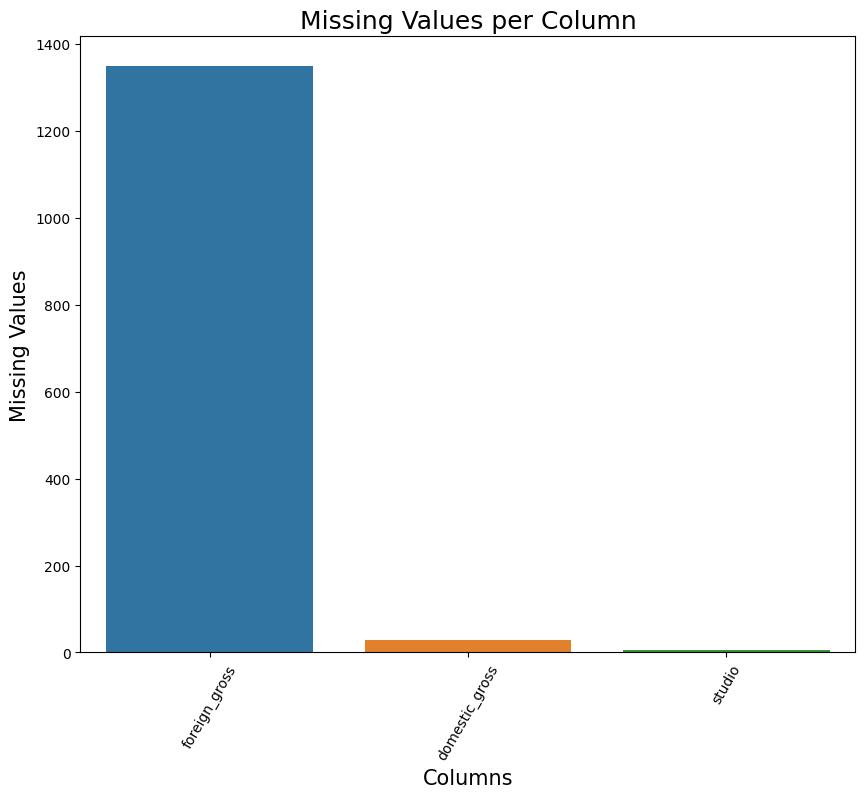

In [12]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (10, 8))
    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks
    plt.xticks(rotation = 60)
    # labeling the y axis
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()
    # save the plot
    fig.savefig("missing.png")
graph_missing(missing_data)

In [13]:
# drop missing values
def drop_missing_value(data, cols):
    """Simple function to drop columns"""
    data.drop(cols, axis = 1, inplace = True)
    
    # confirm columns have been dropped
    return data.columns


drop_missing_value(dt, ["foreign_gross"])

Index(['title', 'studio', 'domestic_gross', 'year'], dtype='object')

In [14]:
def drop_row_missing(data, cols):
    """Simple function to drop row values with missing data in a specific column"""
    for col in cols:
        # drop along the row using axis = 0
        # specify the column using subset
        data.dropna(axis = 0, subset=col, inplace=True)
    # confirm the missing values dropped
    results = missing_values(data)
    return results
drop_row_missing(dt, ["studio"])

,Missing Values,Percentage(%)
domestic_gross,26,0.007688


Fixing Stuctural Issues

In [15]:
def remove_character(data, cols, characters):
    """simple function to remove characters"""
    # loop through the columns
    for col in cols:
        data[col] = data[col].str.strip(characters)
    return data.head()
remove_character(dt,['studio'],'%')

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


Data Type

In [16]:
# data types
dt.dtypes

title              object
studio             object
domestic_gross    float64
year                int64
dtype: object

Outliers

<Axes: xlabel='domestic_gross'>

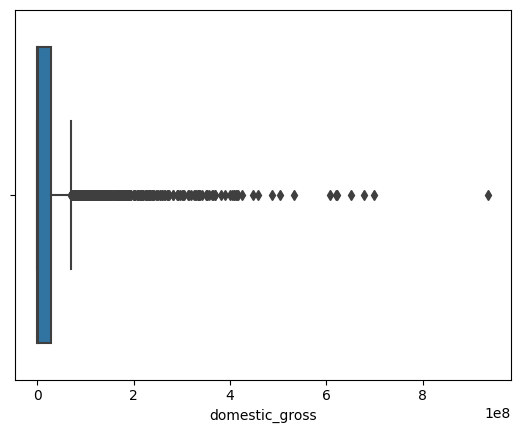

In [17]:
#plot a boxplot to identify outlier in df domestic gross
sns.boxplot(x=dt["domestic_gross"])

In [18]:
# Remove any rows where the column of interest is greater than $250 million
dt = dt[dt["domestic_gross"] >= 250000000]
dt

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,2010
...,...,...,...,...
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,2018
3082,Incredibles 2,BV,608600000.0,2018
3083,Aquaman,WB,335100000.0,2018
3087,Deadpool 2,Fox,318500000.0,2018


Loading the data where we will use;
data
# loading the data
dt_1 = pd.read_csv("tmdb.movies.csv_gz", index_col=0)
# using the index_col=0 argument avoid having the index column as unnamed:0

In [19]:
dt_1= pd.read_csv('tmdb.movies.csv.gz')
dt_1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [20]:
dt_1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
dt_1.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [22]:
# the column names
def data_column(data):
    """Simple function that returns the columns in a DataFrame"""
    cols = list(data.columns)

    return cols


data_column(dt_1)

['Unnamed: 0',
 'genre_ids',
 'id',
 'original_language',
 'original_title',
 'popularity',
 'release_date',
 'title',
 'vote_average',
 'vote_count']

In [23]:
# shape of the data 
def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns")

    return out

data_shape(dt_1)

The DataFrame has:
	* 26517 rows
	* 10 columns


In [24]:
# info for overview of the data
dt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [25]:
# describe for descriptive statistics
dt_1.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [26]:
# Duplicated entries
def identify_duplicates(dt_1):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in dt_1.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(dt_1)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
identify_duplicates(dt_1)# Duplicated entries
def identify_duplicates(dt_1):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in dt_1.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(dt_1)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
identify_duplicates(dt_1)

The Data has no duplicates
The Data has no duplicates


Missing Values

In [27]:
# identify missing
def identify_missing_values(dt_1):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in dt_1.isnull().any():
        # add the bool values to empty list
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")
    return out
identify_missing_values(dt_1)











The Data has no missing values


<Axes: xlabel='vote_average'>

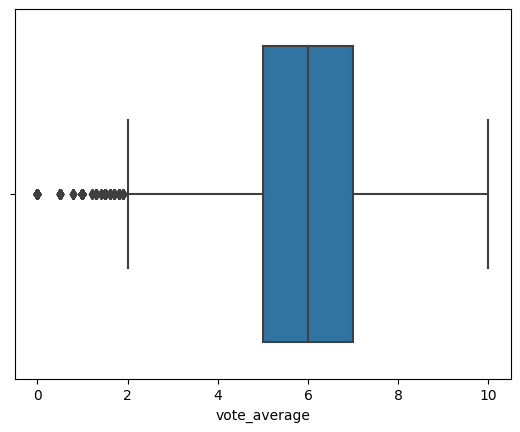

In [28]:
#plot a boxplot to identify outlier in df_1 vote_average
sns.boxplot(x=dt_1["vote_average"])

In [29]:
# Remove any rows where the column of interest is less than -1
dt_1 = dt_1[dt_1["vote_average"] >= -1]
dt_1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Loading the data where we will use;
data
dt_2 = pd.read_csv("tn.movies_budget.csv_gz", index_col=0)


In [30]:
dt_2= pd.read_csv('tn.movie_budgets.csv.gz')
dt_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [31]:
dt_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
dt_2.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [33]:
data_shape(dt_2)

The DataFrame has:
	* 5782 rows
	* 6 columns


In [34]:
# info for overview of the data
dt_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [35]:
# describe for descriptive statistics
dt_2.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Data cleaning for dt_2 "domestic_gross"

In [36]:
#get rid of money signs in dt_2 "domestic_gross."
dt_2['domestic_gross'] = dt_2['domestic_gross'].str.replace('$', '')
dt_2

C:\Users\HP\AppData\Local\Temp\ipykernel_9940\4293876729.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dt_2['domestic_gross'] = dt_2['domestic_gross'].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,$0


In [37]:

#get rid of commas in dt "domestic_gross."
dt_2['domestic_gross'] = dt_2['domestic_gross'].str.replace(',', '')
dt_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,$0
5778,79,"Apr 2, 1999",Following,"$6,000",48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,$0


In [38]:
#convert df_tn 'domestic_gross' from str to int.
dt_2['domestic_gross'] = dt_2['domestic_gross'].astype(int)
dt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 248.6+ KB


Data cleaning for dt_2 "production_budget"

In [39]:
#get rid of money signs in dt_2 "production_budget."
dt_2['production_budget'] = dt_2['production_budget'].str.replace('$', '')
dt_2

C:\Users\HP\AppData\Local\Temp\ipykernel_9940\1249776164.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dt_2['production_budget'] = dt_2['production_budget'].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"7,000",0,$0
5778,79,"Apr 2, 1999",Following,"6,000",48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"5,000",1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"1,400",0,$0


In [40]:
#get rid of commas in dt_2 "production_budget."
dt_2['production_budget'] = dt_2['production_budget'].str.replace(',', '')
dt_2


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,$0
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0


In [41]:
#convert dt_2 'production_budget' from str to int.
dt_2['production_budget'] = dt_2['production_budget'].astype(float)
dt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   int32  
 5   worldwide_gross    5782 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 248.6+ KB


Data cleaning for "worldwide_gross"

In [42]:
#get rid of money signs in dt_2 "worldwide_gross."
dt_2['worldwide_gross'] = dt_2['worldwide_gross'].str.replace('$', '')
dt_2

C:\Users\HP\AppData\Local\Temp\ipykernel_9940\3465750195.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dt_2['worldwide_gross'] = dt_2['worldwide_gross'].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625,"2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,"1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350,"149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868,"1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382,"1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0,0
5778,79,"Apr 2, 1999",Following,6000.0,48482,"240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338,"1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0,0


In [43]:
#get rid of commas in dt_2 "worldwide_gross."
dt_2['worldwide_gross'] = dt_2['worldwide_gross'].str.replace(',', '')
dt_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0,0
5778,79,"Apr 2, 1999",Following,6000.0,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0,0


In [44]:
#convert df_2 'worldwide gross' from str to int.
dt_2['worldwide_gross'] = dt_2['worldwide_gross'].astype(float)
dt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   int32  
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 248.6+ KB


In [45]:
# convert df_tn release_date to date time object 
dt_2['release_date'] =  pd.to_datetime(dt_2['release_date'], infer_datetime_format=True)
dt_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382,1.316722e+09


Data cleaning to eliminate unused columns of data

We will get rid of columns of data that we are not considering in datasets.

In [46]:
# drop unused columns in all dataframes
dt = dt.drop(['year'], axis =1)
dt.head()

,title,studio,domestic_gross
0,Toy Story 3,BV,415000000.0
1,Alice in Wonderland (2010),BV,334200000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0
3,Inception,WB,292600000.0
5,The Twilight Saga: Eclipse,Sum.,300500000.0


In [47]:
dt_1 = dt_1.drop(['original_title'], axis =1)
dt_1

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


In [48]:
dt_1 = dt_1.drop(['id'], axis =1)
dt_1

,Unnamed: 0,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",en,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",en,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",en,0.600,2018-06-22,Trailer Made,0.0,1


In [49]:
dt_2 = dt_2.drop(['domestic_gross'], axis =1)
dt_2

,id,release_date,movie,production_budget,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09
...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.000000e+00


Merging of datasets

In [50]:
dt_merge=dt.merge(dt_1, how='inner', on='title')
dt_merge.head(150)

,title,studio,domestic_gross,Unnamed: 0,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,7,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,4,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186
2,The Twilight Saga: Eclipse,Sum.,300500000.0,15,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909
3,Iron Man 2,Par.,312400000.0,2,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368
4,Despicable Me,Uni.,251500000.0,8,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057
...,...,...,...,...,...,...,...,...,...,...
63,Black Panther,BV,700100000.0,23817,"[28, 12, 14, 878]",en,44.140,2018-02-16,7.4,12365
64,Jurassic World: Fallen Kingdom,Uni.,417700000.0,23829,"[28, 12, 878]",en,34.958,2018-06-22,6.5,5995
65,Incredibles 2,BV,608600000.0,23826,"[28, 12, 16, 10751]",en,36.286,2018-06-15,7.6,6354
66,Aquaman,WB,335100000.0,23824,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155


In [51]:
dt_merge= dt_merge.rename(columns={'title': 'movie'})
dt_merge

,movie,studio,domestic_gross,Unnamed: 0,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,7,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,4,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186
2,The Twilight Saga: Eclipse,Sum.,300500000.0,15,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909
3,Iron Man 2,Par.,312400000.0,2,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368
4,Despicable Me,Uni.,251500000.0,8,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057
...,...,...,...,...,...,...,...,...,...,...
63,Black Panther,BV,700100000.0,23817,"[28, 12, 14, 878]",en,44.140,2018-02-16,7.4,12365
64,Jurassic World: Fallen Kingdom,Uni.,417700000.0,23829,"[28, 12, 878]",en,34.958,2018-06-22,6.5,5995
65,Incredibles 2,BV,608600000.0,23826,"[28, 12, 16, 10751]",en,36.286,2018-06-15,7.6,6354
66,Aquaman,WB,335100000.0,23824,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155


In [52]:
merged_dt = dt_merge.merge(dt_2, on='movie')
merged_dt

,movie,studio,domestic_gross,Unnamed: 0,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,id,release_date_y,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,7,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340,47,2010-06-18,200000000.0,1.068880e+09
1,Inception,WB,292600000.0,4,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,38,2010-07-16,160000000.0,8.355246e+08
2,The Twilight Saga: Eclipse,Sum.,300500000.0,15,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909,53,2010-06-30,68000000.0,7.061028e+08
3,Iron Man 2,Par.,312400000.0,2,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,15,2010-05-07,170000000.0,6.211564e+08
4,Despicable Me,Uni.,251500000.0,8,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057,50,2010-07-09,69000000.0,5.434646e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Black Panther,BV,700100000.0,23817,"[28, 12, 14, 878]",en,44.140,2018-02-16,7.4,12365,42,2018-02-16,200000000.0,1.348258e+09
59,Jurassic World: Fallen Kingdom,Uni.,417700000.0,23829,"[28, 12, 878]",en,34.958,2018-06-22,6.5,5995,13,2018-06-22,170000000.0,1.305773e+09
60,Incredibles 2,BV,608600000.0,23826,"[28, 12, 16, 10751]",en,36.286,2018-06-15,7.6,6354,44,2018-06-15,200000000.0,1.242521e+09
61,Aquaman,WB,335100000.0,23824,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155,36,2018-12-21,160000000.0,1.146895e+09


In [53]:
dt_gp_movie = dt_merge.groupby('movie')
dt_gp_movie.first()
#reassign back to a dataframe object
dt_merged_movie = dt_gp_movie.first()
dt_merged_movie


,studio,domestic_gross,Unnamed: 0,genre_ids,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,
American Sniper,WB,350100000.0,11057,"[10752, 28]",en,18.473,2014-12-25,7.4,7658
Aquaman,WB,335100000.0,23824,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155
Avengers: Age of Ultron,BV,459000000.0,14169,"[28, 12, 878]",en,44.383,2015-05-01,7.3,13457
Avengers: Infinity War,BV,678800000.0,23811,"[12, 28, 14]",en,80.773,2018-04-27,8.3,13948
Batman v Superman: Dawn of Justice,WB,330400000.0,17390,"[28, 12, 14]",en,28.088,2016-03-25,5.8,11991
Black Panther,BV,700100000.0,3444,"[28, 16]",en,2.058,2011-01-18,5.1,11
Captain America: Civil War,BV,408100000.0,17382,"[12, 28, 878]",en,39.137,2016-05-06,7.4,14000
Captain America: The Winter Soldier,BV,259800000.0,11063,"[28, 12, 878]",en,18.073,2014-04-04,7.7,11034
Deadpool,Fox,363100000.0,17383,"[28, 12, 35]",en,35.067,2016-02-12,7.6,20175


In [54]:
#interested in movie release by month - create new column named "release_month"
dt_merged_movie['release_month'] = pd.DatetimeIndex(dt_merged_movie['release_date']).month
dt_merged_movie.head()

,studio,domestic_gross,Unnamed: 0,genre_ids,original_language,popularity,release_date,vote_average,vote_count,release_month
movie,,,,,,,,,,
American Sniper,WB,350100000.0,11057,"[10752, 28]",en,18.473,2014-12-25,7.4,7658,12
Aquaman,WB,335100000.0,23824,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155,12
Avengers: Age of Ultron,BV,459000000.0,14169,"[28, 12, 878]",en,44.383,2015-05-01,7.3,13457,5
Avengers: Infinity War,BV,678800000.0,23811,"[12, 28, 14]",en,80.773,2018-04-27,8.3,13948,4
Batman v Superman: Dawn of Justice,WB,330400000.0,17390,"[28, 12, 14]",en,28.088,2016-03-25,5.8,11991,3


In [55]:
merged_dt['profits'] = merged_dt['worldwide_gross'] -merged_dt['production_budget']
merged_dt['profits'] =merged_dt ['profits'].astype(int)
merged_dt

,movie,studio,domestic_gross,Unnamed: 0,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,id,release_date_y,production_budget,worldwide_gross,profits
0,Toy Story 3,BV,415000000.0,7,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340,47,2010-06-18,200000000.0,1.068880e+09,868879522
1,Inception,WB,292600000.0,4,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,38,2010-07-16,160000000.0,8.355246e+08,675524642
2,The Twilight Saga: Eclipse,Sum.,300500000.0,15,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909,53,2010-06-30,68000000.0,7.061028e+08,638102828
3,Iron Man 2,Par.,312400000.0,2,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,15,2010-05-07,170000000.0,6.211564e+08,451156389
4,Despicable Me,Uni.,251500000.0,8,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057,50,2010-07-09,69000000.0,5.434646e+08,474464573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Black Panther,BV,700100000.0,23817,"[28, 12, 14, 878]",en,44.140,2018-02-16,7.4,12365,42,2018-02-16,200000000.0,1.348258e+09,1148258224
59,Jurassic World: Fallen Kingdom,Uni.,417700000.0,23829,"[28, 12, 878]",en,34.958,2018-06-22,6.5,5995,13,2018-06-22,170000000.0,1.305773e+09,1135772799
60,Incredibles 2,BV,608600000.0,23826,"[28, 12, 16, 10751]",en,36.286,2018-06-15,7.6,6354,44,2018-06-15,200000000.0,1.242521e+09,1042520711
61,Aquaman,WB,335100000.0,23824,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155,36,2018-12-21,160000000.0,1.146895e+09,986894640


In [56]:
merged_dt['release_month'] = pd.DatetimeIndex(merged_dt['release_date_x']).month
merged_dt.head()

,movie,studio,domestic_gross,Unnamed: 0,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,id,release_date_y,production_budget,worldwide_gross,profits,release_month
0,Toy Story 3,BV,415000000.0,7,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340,47,2010-06-18,200000000.0,1.068880e+09,868879522,6
1,Inception,WB,292600000.0,4,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,38,2010-07-16,160000000.0,8.355246e+08,675524642,7
2,The Twilight Saga: Eclipse,Sum.,300500000.0,15,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909,53,2010-06-30,68000000.0,7.061028e+08,638102828,6
3,Iron Man 2,Par.,312400000.0,2,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,15,2010-05-07,170000000.0,6.211564e+08,451156389,5
4,Despicable Me,Uni.,251500000.0,8,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057,50,2010-07-09,69000000.0,5.434646e+08,474464573,7


# Data Visualization

. Wha1t is the distribution of movie budgets in the dataset?
2. How does the popularity of a movie relate to its budget and revenue?
3. Are there any trends in the release of movies over the years?
4. Which movie genres are the most profitable on average?
5. Which studios have produced the most successful movies in terms of revenue and profits?
6. Is there a correlation between the votecount and its revenue?

1. What is the distribution of movie budgets in the dataset?

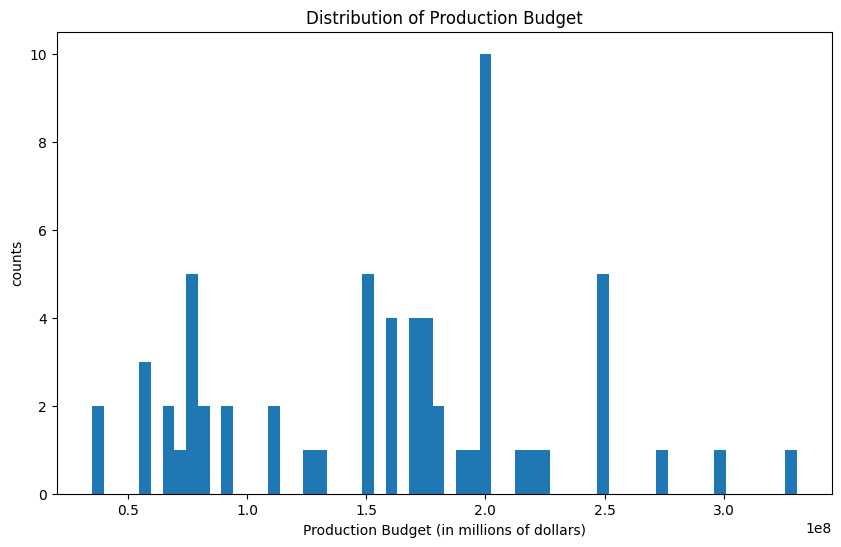

In [57]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
# Plot a histogram of production_budget with 50 bins
ax.hist(merged_dt['production_budget'], bins=60)
# Set the x-axis label
ax.set_xlabel('Production Budget (in millions of dollars)')
# Set the y-axis label
ax.set_ylabel('counts')
# Set the title
ax.set_title('Distribution of Production Budget')
# Show the plot
plt.show()

Observation
The histogram shows the distribution of production budgets of movies. The majority of movies have a production budget between 0 and 100 million dollars. The distribution is left-skewed, indicating that there are a few movies with very high production budgets, while the majority of movies have lower budgets.

 How does the popularity of a movie relate to its budget and revenue?

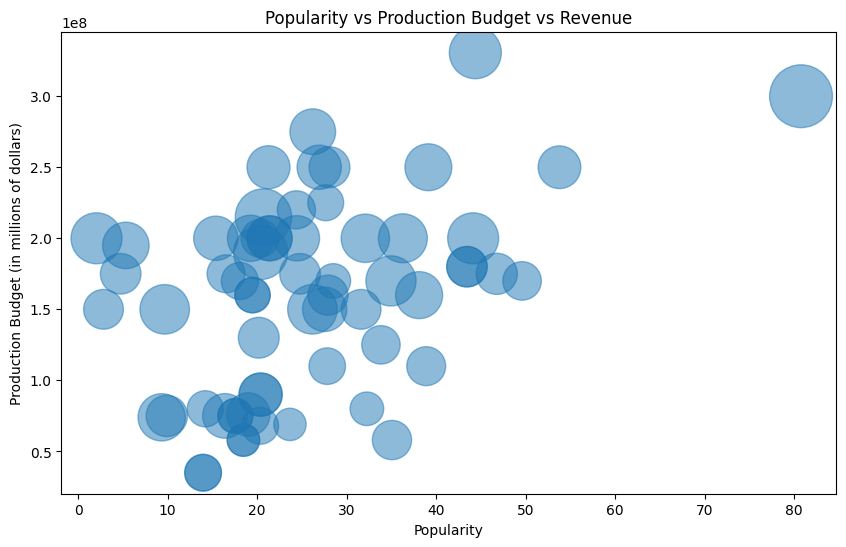

In [58]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
# Create the scatter plot
ax.scatter(merged_dt['popularity'], merged_dt['production_budget'], s=merged_dt['worldwide_gross']/1000000, alpha=0.5)
# Set the x-axis label
ax.set_xlabel('Popularity')
# Set the y-axis label
ax.set_ylabel('Production Budget (in millions of dollars)')
# Set the title
ax.set_title('Popularity vs Production Budget vs Revenue')
# Show the plot
plt.show()



Observation
>The scatter plot shows the relationship between popularity, production budget, and worldwide gross revenue. The size of the dots represents the worldwide gross revenue of the movies. From the plot, it can be observed that there is a weak positive correlation between popularity and production budget. Also, there is a weak positive correlation between popularity and worldwide gross revenue. However, there doesn't seem to be a strong relationship between production budget and worldwide gross revenue

3. Are there any trends in the release of movies over the years?

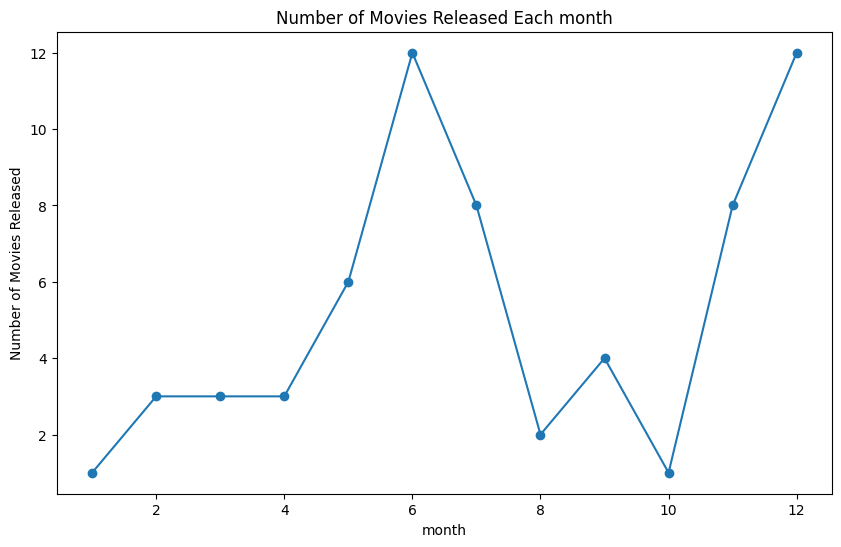

In [59]:
# Count the number of movies released each year
movies_per_year = merged_dt['release_month'].value_counts().sort_index()
# Create a line graph showing the number of movies released each year
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(movies_per_year.index, movies_per_year.values, marker='o')
ax.set_xlabel('month')
ax.set_ylabel('Number of Movies Released')
ax.set_title('Number of Movies Released Each month')
plt.show()

Observation
>The line plot shows the average worldwide gross revenue for movies released in each month. The plot indicates that the summer months (May, June, July) and the holiday season months (November and December) tend to have higher average gross revenue. This could be due to the fact that these months are associated with blockbuster releases and holiday-themed films, which tend to attract a larger audience. On the other hand, the winter and early spring months (January to April) tend to have lower average.

4. Which movie genres are the most profitable on average?

In [60]:
genre_profit = merged_dt.groupby(['genre_ids'])['profits'].mean().reset_index()
genre_profit = genre_profit.sort_values('profits', ascending=False)
genre_profit

,genre_ids,profits
6,"[12, 28, 14]",1.748134e+09
26,"[28, 12, 878, 53]",1.433855e+09
33,"[28, 80, 53]",1.328723e+09
30,"[28, 16]",1.148258e+09
12,"[16, 12, 10751]",1.122470e+09
36,[53],1.122470e+09
0,"[10751, 16, 12, 35]",1.086336e+09
20,"[28, 12, 16, 10751]",1.042521e+09
29,"[28, 16, 35, 10751, 12]",9.597278e+08
23,"[28, 12, 53]",9.105270e+08


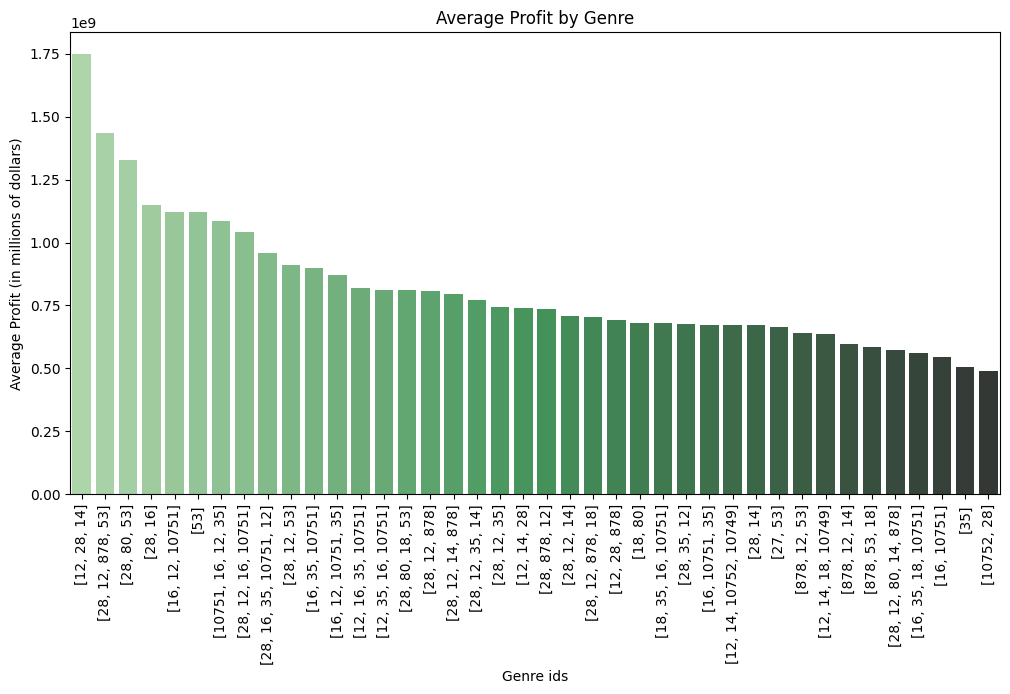

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x='genre_ids', y='profits', data=genre_profit, palette='Greens_d')
plt.xlabel('Genre ids')
plt.ylabel('Average Profit (in millions of dollars)')
plt.xticks(rotation=90)
plt.title('Average Profit by Genre')
plt.show()

Observation
> The bar plot shows the average profits for each movie genre. Adventure movies have the highest average profits, followed by sci-fi and animation. In contrast, documentaries and foreign movies have the lowest average profits. It is interesting to note that despite having the highest average profits, adventure movies do not have the highest revenue, indicating that they are not as common as other genres. The plot provides valuable insights into which movie genres are the most profitable on average.

5. Which studios have produced the most successful movies in terms of revenue and profits?

In [62]:
# Group the movies by studio and calculate the total revenue and profits for each studio
studio_revenue = merged_dt.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False)
studio_profits = merged_dt.groupby('studio')['profits'].sum().sort_values(ascending=False)
# Print the top 10 studios by revenue and profits
print('Top 10 studios by revenue:')
print(studio_revenue.head(10))
print('\nTop 10 studios by profits:')
print(studio_profits.head(10))

Top 10 studios by revenue:
studio
BV         2.312961e+10
Uni.       1.034276e+10
WB         9.365501e+09
Sony       4.677576e+09
WB (NL)    4.317864e+09
LGF        3.607340e+09
Fox        1.587706e+09
P/DW       1.123791e+09
Sum.       7.061028e+08
Par.       6.211564e+08
Name: worldwide_gross, dtype: float64

Top 10 studios by profits:
studio
BV         18949006636
Uni.        9248755900
WB          7514500545
Sony        3902575984
WB (NL)     3497863982
LGF         2952340131
Fox         1419706150
P/DW         928790543
Sum.         638102828
Par.         451156389
Name: profits, dtype: int64


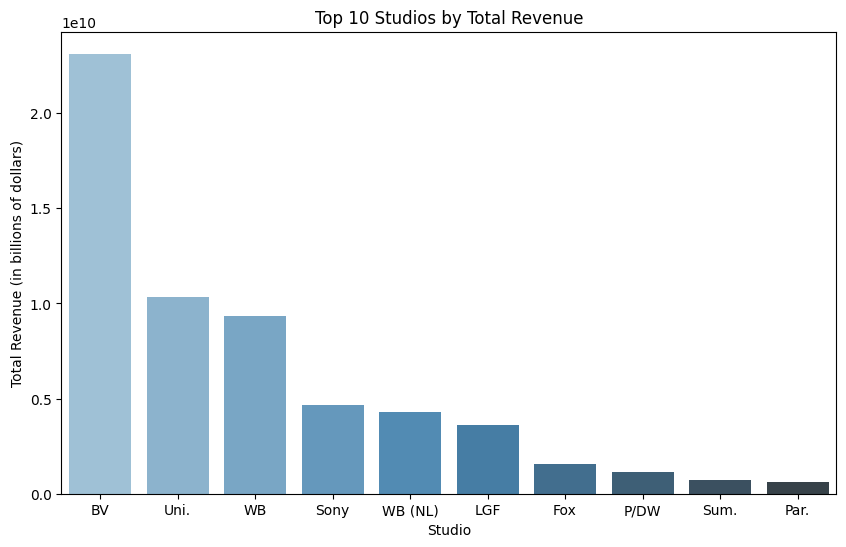

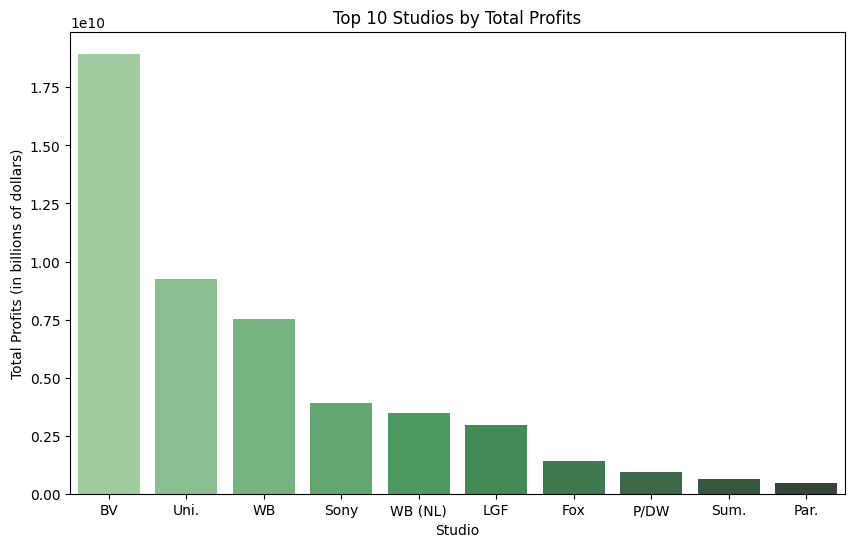

In [63]:
# Create a bar plot of studio revenue
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=studio_revenue.index[:10], y=studio_revenue.values[:10], palette='Blues_d', ax=ax)
ax.set_xlabel('Studio')
ax.set_ylabel('Total Revenue (in billions of dollars)')
ax.set_title('Top 10 Studios by Total Revenue')
plt.show()
# Create a bar plot of studio profits
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=studio_profits.index[:10], y=studio_profits.values[:10], palette='Greens_d', ax=ax)
ax.set_xlabel('Studio')
ax.set_ylabel('Total Profits (in billions of dollars)')
ax.set_title('Top 10 Studios by Total Profits')
plt.show()

Observation
> The bar plot of top 10 studios by total revenue shows that Bv is the most successful studio in terms of revenue, followed by Uni ND WB. On the other hand, the bar plot of top 10 studios by total profits shows that BV is also the most successful studio in terms of profits, followed by Uni and WB. These results suggest that BV is the most successful studio overall.

6. Is there a correlation between the votecount of a movie and its revenue or popularity?

In [64]:
votes_and_budget = merged_dt[['vote_count', 'popularity']]
votes_and_budget_1000 = votes_and_budget.loc[votes_and_budget['vote_count'] >= 1000]
votes_and_budget_1000 = votes_and_budget_1000.round(0)
votes_and_budget_1000

,vote_count,popularity
0,8340,24.0
1,22186,28.0
2,4909,20.0
3,12368,29.0
4,10057,24.0
5,4961,5.0
6,6231,32.0
7,10441,19.0
8,13933,26.0
9,12076,27.0


<Axes: xlabel='vote_count', ylabel='popularity'>

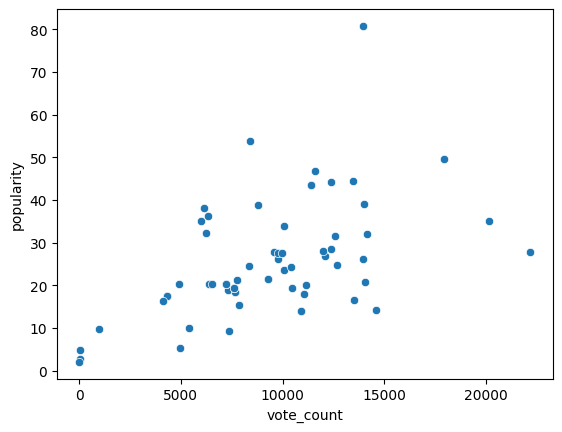

In [65]:
sns.scatterplot(data=merged_dt, x="vote_count", y="popularity")

Observation
> The scatter plot shows a positive correlation between the number of votes and popularity, indicating that more popular movies tend to have higher vote counts.

In [66]:
votes_and_budget = merged_dt[['vote_count', 'worldwide_gross']]
votes_and_budget_1000 = votes_and_budget.loc[votes_and_budget['vote_count'] >= 1000]
votes_and_budget_1000 = votes_and_budget_1000.round(0)
votes_and_budget_1000

,vote_count,worldwide_gross
0,8340,1.068880e+09
1,22186,8.355246e+08
2,4909,7.061028e+08
3,12368,6.211564e+08
4,10057,5.434646e+08
5,4961,1.123791e+09
6,6231,5.864643e+08
7,10441,1.110527e+09
8,13933,1.084439e+09
9,12076,1.017004e+09


<Axes: xlabel='vote_count', ylabel='worldwide_gross'>

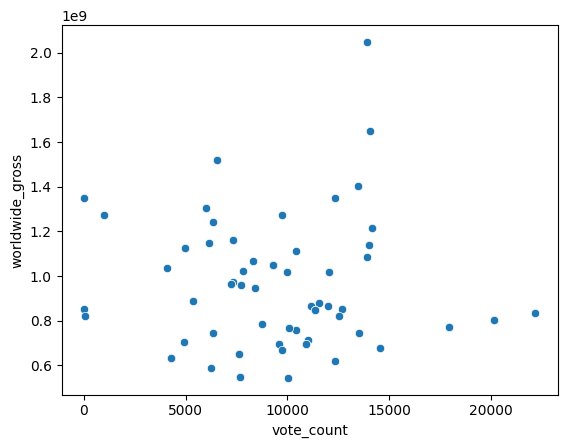

In [67]:
sns.scatterplot(data=merged_dt, x="vote_count", y="worldwide_gross")

Observation
> Based on the scatterplot, there appears to be a positive correlation between the number of votes a movie receives and its worldwide gross revenue. This suggests that the more people who vote for a movie, the higher its revenue is likely to be.

SUMMARY
>Project will consider these datasets: 'tn.movie_budgets.csv.gz' and 'tmdb.movies.csv.gz' and 'imdb.title.basics.csv.gz'

The bottom line for the "success" of a film is the money it makes (profits). Variables that may influence the "success" of a film:

Worldwide Gross Revenue
Vote Count
Popularity
Release Date
Movie
Genre_ids